In [13]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import GroverOperator
from qiskit_machine_learning.circuit.library import RawFeatureVector

# import basic plot tools
#import qiskit.visualization as vis
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import vector2latex
%matplotlib inline

# rotations

In [5]:
sim = Aer.get_backend('aer_simulator')
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(np.pi/2, 0, 0, 0) # angles: theta, phi, ?
qc.draw()

┌────────────┐
q_0: ┤ U(π/2,0,0) ├
     └────────────┘

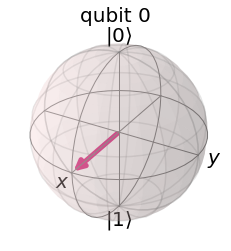

In [6]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

## global phase makes indistinguishable qubits

In [7]:
qc = QuantumCircuit(2)
# global phase of i -> 2 qubits indistinguishable
qc.initialize([complex(0,1./np.sqrt(2)), complex(0,1./np.sqrt(2))], 0) # 1/sqrt(2) * (i i)^T
qc.initialize([complex(1./np.sqrt(2)), complex(1./np.sqrt(2))], 1) # 1/sqrt(2) * (1 1)^T
qc.draw()

┌───────────────────────────────┐
q_0: ┤ Initialize(0.70711j,0.70711j) ├
     └┬─────────────────────────────┬┘
q_1: ─┤ Initialize(0.70711,0.70711) ├─
      └─────────────────────────────┘

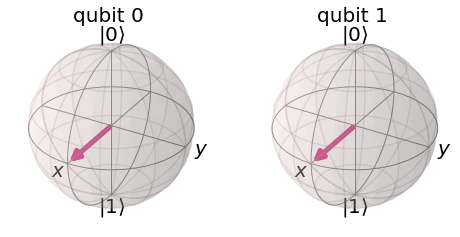

In [8]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

## qubits with different relative phases distinguishable by Hadamard gate

### qubit 1: rotate x by pi/3, qubit 2: rotate x by -pi/3

In [33]:
qc_rot = QuantumCircuit(2)
qc_rot.u(np.pi/4, 0, 0, 0)
qc_rot.u(-np.pi/4, 0, 0, 1)

In [34]:
qc = QuantumCircuit(2)
qc = qc.compose(qc_rot)
qc.draw()

┌────────────┐
q_0: ─┤ U(π/4,0,0) ├
     ┌┴────────────┤
q_1: ┤ U(-π/4,0,0) ├
     └─────────────┘

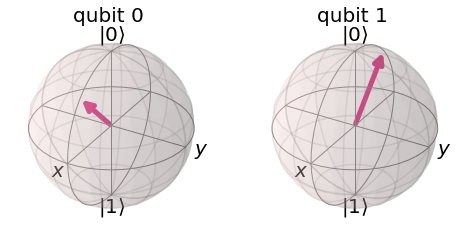

In [35]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [52]:
vector2latex(state, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

### probabilities

In [53]:
sum(state[0:2])**2

(0.2499999999999999+4.3297802811774646e-17j)

In [54]:
sum(state[2:4])

(1.2071067811865475-4.329780281177467e-17j)

In [40]:
np.vdot(np.array(sum(state[0:2])),np.array(sum(state[0:2]))) 

(1.4571067811865475+0j)

In [41]:
np.vdot(np.array(sum(state[2:4])),np.array(sum(state[2:4]))) 

(0.25+0j)

In [22]:
print('q1 prob |0>, prob |1>', np.sqrt(np.abs(sum(state[0:2]), sum(state[2:4]))))

TypeError: return arrays must be of ArrayType

### apply Hadamard to both qubits

In [44]:
qc = QuantumCircuit(2)
qc = qc.compose(qc_rot)
qc.h(0)
qc.h(1)
qc.draw()

┌────────────┐┌───┐
q_0: ─┤ U(π/4,0,0) ├┤ H ├
     ┌┴────────────┤├───┤
q_1: ┤ U(-π/4,0,0) ├┤ H ├
     └─────────────┘└───┘

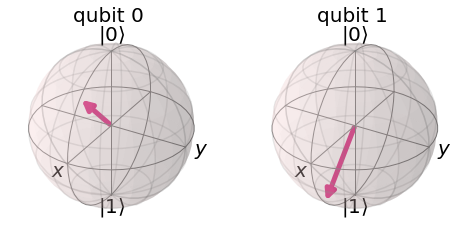

In [45]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [46]:
vector2latex(state, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [47]:
state

array([0.35355339+1.79345371e-17j, 0.14644661+2.53632657e-17j,
       0.85355339-6.12323400e-17j, 0.35355339+1.79345371e-17j])